### Traditional Approach

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [4]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [5]:
y_pred = model.predict(x_test)

In [6]:
acc=accuracy_score(y_test,y_pred)

In [7]:
print(acc)

0.9385964912280702


### TPOT Library

In [8]:
%%capture
!pip install TPOT

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [10]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
tpot= TPOTClassifier(generations=3,population_size=50)
tpot.fit(x_train,y_train)

TPOTClassifier(generations=3, population_size=50)

In [13]:
acc=tpot.score(x_test,y_test)

In [14]:
print(acc)

0.9473684210526315


In [15]:
tpot.export('breast_cancer_detection_pipeline.py')

### PyCaret Library

In [1]:
%%capture
!pip install pycaret

In [2]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from pycaret.classification import *

s = setup(data,target='Class variable')

,Description,Value
0,Session id,394
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7672,0.8180,0.5444,0.7239,0.6161,0.4550,0.4676,1.1360
ridge,Ridge Classifier,0.7634,0.8163,0.5120,0.7306,0.5937,0.4367,0.4544,0.0370
lda,Linear Discriminant Analysis,0.7596,0.8169,0.5330,0.7022,0.6009,0.4355,0.4462,0.0380
nb,Naive Bayes,0.7577,0.8160,0.5886,0.6801,0.6258,0.4498,0.4555,0.0360
gbc,Gradient Boosting Classifier,0.7560,0.8055,0.5822,0.6708,0.6160,0.4411,0.4474,0.1910
et,Extra Trees Classifier,0.7523,0.7942,0.5240,0.6914,0.5875,0.4186,0.4306,0.1960
rf,Random Forest Classifier,0.7449,0.7923,0.5611,0.6590,0.5962,0.4149,0.4230,0.2960
qda,Quadratic Discriminant Analysis,0.7393,0.8032,0.5295,0.6482,0.5787,0.3951,0.4010,0.0580
lightgbm,Light Gradient Boosting Machine,0.7280,0.7854,0.5444,0.6295,0.5738,0.3794,0.3862,0.1360
xgboost,Extreme Gradient Boosting,0.7243,0.7747,0.5711,0.6206,0.5843,0.3814,0.3882,0.0920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

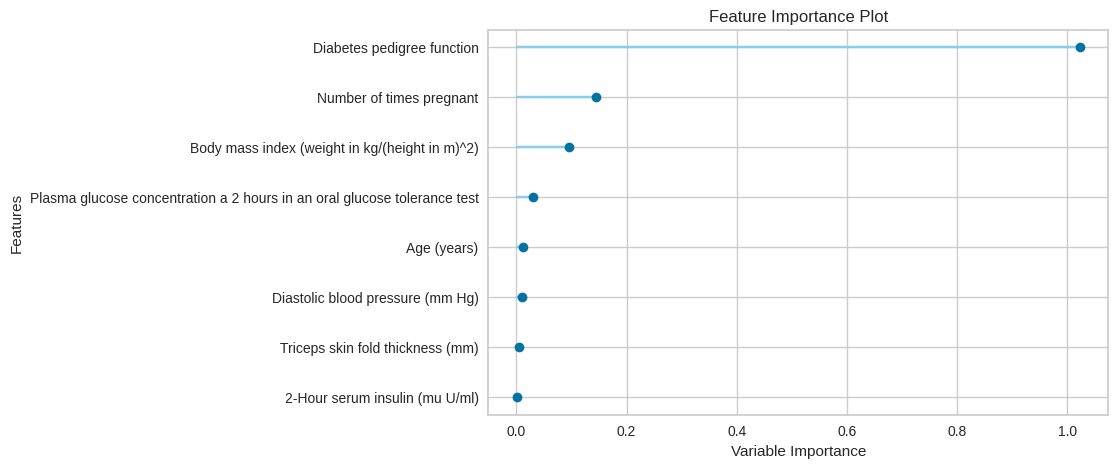

In [5]:
plot_model(best,plot='feature')

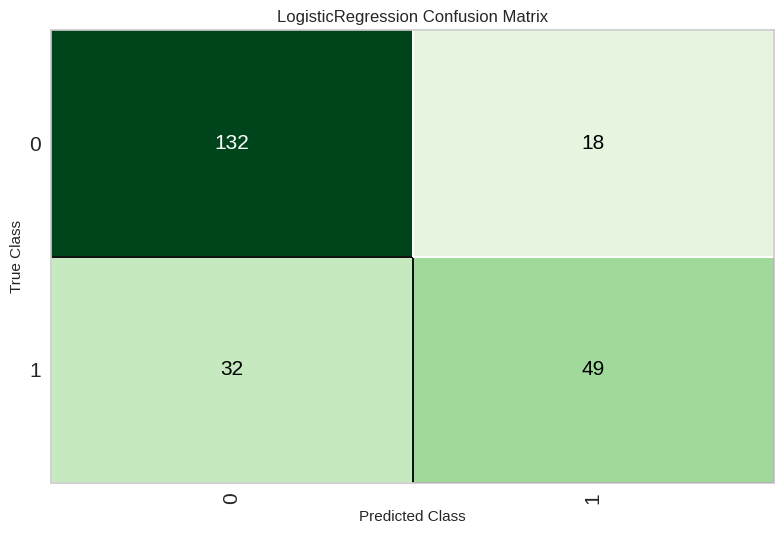

In [6]:
plot_model(best,plot='confusion_matrix')

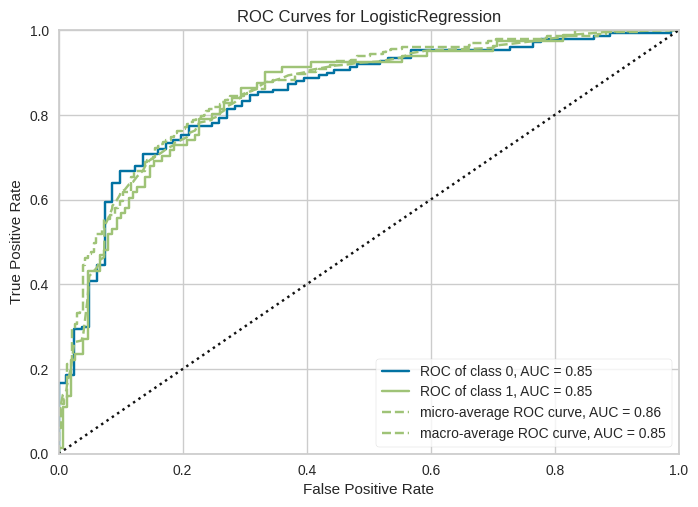

In [7]:
plot_model(best,plot='auc')

In [8]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
save_model(best,'demo_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [10]:
%%capture
!pip install gradio

In [ ]:
create_app(best)

In [14]:
tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8120,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.8333,0.9158,0.6316,0.8571,0.7273,0.6112,0.6260
2,0.7407,0.8015,0.4737,0.6923,0.5625,0.3874,0.4014
3,0.7593,0.8150,0.5789,0.6875,0.6286,0.4524,0.4561
4,0.7778,0.8150,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.8333,0.8992,0.7368,0.7778,0.7568,0.6301,0.6307
6,0.7037,0.7549,0.4211,0.6154,0.5000,0.2998,0.3107
7,0.8491,0.9000,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.7170,0.6937,0.3333,0.6667,0.4444,0.2818,0.3123


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LogisticRegression(C=7.794, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=394, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)